Most common words in positive:
[('rate', 1013), ('question', 996), ('euro', 634), ('price', 550), ('inflat', 548), ('area', 545), ('bank', 540), ('govern', 509), ('growth', 461), ('market', 432)] 

Most common words in negative:
[('rate', 1315), ('question', 1033), ('price', 985), ('inflat', 926), ('euro', 704), ('growth', 676), ('monetari', 667), ('polici', 612), ('market', 547), ('risk', 540)]
(2, 4575)
{'rate': 0.3182016858028791, 'question': 0.312861677255348, 'euro': 0.19915090700792235, 'price': 0.17276498242012192, 'inflat': 0.17213674612041238, 'area': 0.17119439167084807, 'bank': 0.16962380092157425, 'govern': 0.15988613827607645, 'growth': 0.14480846708304765, 'market': 0.13569904073725939}

Negative words with highest TF/IDF:
{'rate': 0.33205229709148454, 'question': 0.26084412387490763, 'price': 0.2487235837529371, 'inflat': 0.23382541985301497, 'euro': 0.17776792178890125, 'growth': 0.17069760671775175, 'monetari': 0.1684250054448823, 'polici': 0.15453688655512438, 'market

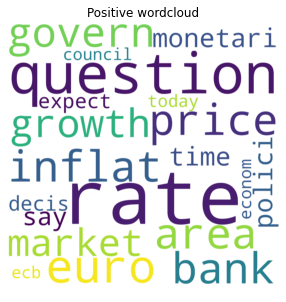

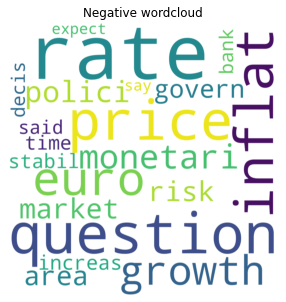

In [24]:
import pandas as pd

press_releases = pd.read_csv('ecb_scraper/outputs/clean_text_excl_nums.csv')
key_rates = pd.read_csv('ECB_key_rates/ECB Data Portal_20231016130234.csv')

# Merge press_releases and key_rates on date
press_releases['date'] = pd.to_datetime(press_releases['date'])
key_rates['date'] = pd.to_datetime(key_rates['DATE'])
merged = press_releases.merge(key_rates, on='date', how='left')

data = merged.drop(columns=['DATE', 'TIME PERIOD'])
data = data.rename(columns={data.columns[2]: 'DFR', data.columns[3]: 'MLF', data.columns[4]: ' MRO'})

data['DFR_change'] = data['DFR'].diff()
data['MLF_change'] = data['MLF'].diff()
data['MRO_change'] = data[' MRO'].diff()
data['AVG_change'] = data[['DFR_change', 'MLF_change', 'MRO_change']].mean(axis=1)

policy_effect = data[['date', 'text', 'AVG_change']]
policy_effect.to_csv('policy_change_rates.csv', index=False)
